Question 1:

Let the first matrix be given by $B = [b_{ij}]_{n \times k}$

Let the second matrix be given by $C = [c_{ij}]_{k \times m}$

The resultant matrix $A$ will have size $n \times m $ in which each element is given by : 
$ 
    a_{ij} = \sum_{r=1}^{k}{b_{ir} \times c_{rj}}
$ 




So, each element of $A$ requires $ k $ multiplications and $k - 1$ additions. There are $n \times m$ such elements and thus, totally $nm(k-1)$ additions and $nmk$ multiplications are required.

Question 2:

In [697]:
import time
import numpy as np
import pandas as pd

def multiplier(a,b):
    c = []
    for i in range(len(a)):
        temp = []
        for j in range(len(b[0])):
            temp_ = 0
            for k in range(len(a[0])):
                temp_ += (a[i][k] * b[k][j])
            temp.append(temp_)

        c.append(temp)

    return c

start_1 = time.perf_counter()
ans = multiplier([[1,0,0],[3,0,1],[7,8,9]], [[0,98,1],[12,1,0],[2,2,4]])
base_perf = time.perf_counter() - start_1
print("Time for execution of multiplication with list of lists:" , base_perf)
print(ans)

a = np.array([[1,0,0],[3,0,1],[7,8,9]])
b = np.array([[0,98,1],[12,1,0],[2,2,4]])
start_1 = time.perf_counter()
c = np.matmul(a,b)
np_perf = time.perf_counter() - start_1
print("Time for execution of numpy based multiplication", np_perf)
print(c)

Time for execution of multiplication with list of lists: 0.00024619999749120325
[[0, 98, 1], [2, 296, 7], [114, 712, 43]]
Time for execution of numpy based multiplication 0.00014830000145593658
[[  0  98   1]
 [  2 296   7]
 [114 712  43]]


The numpy based multiplication runs much faster than list of lists implementation as numpy arrays are implemented in C where array elements are stored in contiguous blocks of memory and thus accessing them is much faster than in python.

Another contributor to speed is the fact that numpy uses vectorised operations (low level optimisations which allow parallel computing) instead of operating element by element in for loops as we have implemented above.

Question 3:

For an array of size n: The total number of passes to find the median will be $\lceil{\frac{n}{2}}\rceil$(for odd $n$) and $\lceil{\frac{n}{2}}\rceil + 1$(for even $n$). Each pass has time complexity of $O(n)$ and hence the time complexity of this algorithm will be $O(n^2)$.

We can use quickselect to find the median in a faster manner. Although the worst case time complexity of this algorithm is $O(n^2)$, it has an average time complexity of $O(n)$.

Quickselect is used to find the $kth$ smallest element of an array. It involves selecting a pivot and then partioning the array into elements which are less than the pivot on the left of it and elements greater than the pivot on the right of the pivot. 

If the pivot's position is $k$ (1 - based indexing, else in 0 based indexing it is $k - 1$ ), we are done. Else if it is lesser than this value, we recursively call quickselect on the right side of the pivot, else we recursively call quickselect on the left side of the pivot.

To find the median, if n is odd it is sufficient to find the $\lceil{\frac{n}{2}}\rceil \ th$ smallest element. For even $n$ we find ${\frac{n}{2}} \ th$ and ${\frac{n}{2}} + 1 \ th$ smallest elements and take their mean.

In [733]:
import math, random


def partition(start, end, a):
    pivot = a[start]
    i = start + 1
    j = end

    while(i <= j):
        while(i <= end and a[i] <= pivot):
            i += 1
        while(j > start and a[j] > pivot):
            j -= 1
        if(i <= j):
            a[i],a[j] = a[j],a[i]
            i += 1
            j -= 1

    a[start], a[i-1] = a[i-1], a[start]
    return i - 1

def quickselect(start , end, a, k):
    if (end <= start):
        return a[start]

    req = partition(start, end, a)

    if(req == k):
        return a[k]
    elif(req > k):
        return quickselect(start, req - 1 , a, k)
    else:
        return quickselect(req + 1, end , a, k)



def naivemethod(li):
    n = len(li)
    for i in range(n // 2 + 1):
        mini = i
        for j in range(i, n):
            if li[j] < li[mini]:
                mini = j 
        
        li[i], li[mini] = li[mini], li[i]
    if(n & 1):
        return li[(n)//2]
    else:
        return (li[(n) // 2] + li[((n)//2) - 1])/2
    

li = [i for i in range(1,10000)]
random.shuffle(li)

start_1 = time.perf_counter()
ans = naivemethod(list(li))
naive_time = time.perf_counter() - start_1
print("Naive method time (in s)", naive_time)
print("Median:", ans)

start_1 = time.perf_counter()
n = len(li)
if(n & 1):
    ans = quickselect(0, n - 1, li, math.ceil(n/2) - 1)
else:
    ans = (quickselect(0, n - 1, li, int(n/2) - 1) + quickselect(0, n - 1, li, int(n/2)))/2
py_time = time.perf_counter() - start_1
print("Quickselect based median finder implementation time (in s):", py_time)
print("Median:",ans)

li = np.array(li)
start_1 = time.perf_counter()
ans = np.median(li)
np_time = time.perf_counter() - start_1
print("Using np.median time(in s):", np_time)
print("Median:",ans)

Naive method time (in s) 2.077995200001169
Median: 5000
Quickselect based median finder implementation time (in s): 0.002943999999843072
Median: 5000
Using np.median time(in s): 0.00019109999993816018
Median: 5000.0


Question 4 :

Let $f = x^2y + y^3 sin(x)$

The gradient wrt to x is given by :
$
    \frac{\partial f}{\partial x} = y\frac{\partial x^2}{\partial x} + y^3\frac{\partial sin(x)}{\partial x} = 2xy + y^3cos(x)
$

The gradient wrt to y is given by :
$
    \frac{\partial f}{\partial y} = x^2\frac{\partial y}{\partial y} + sin(x)\frac{\partial y^3}{\partial y} = x^2 + 3y^2sin(x)
$

Question 5:

In [699]:
import jax as jx
import jax.numpy as jnp

def fun(x,y):
    return (x**2 * y + y**3 * jnp.sin(x))

ans_ = jx.grad(lambda x, y : fun(x,y) , argnums= 0)
ans__ = jx.grad(lambda x, y : fun(x,y) , argnums= 1)

def verifier_y(x,y, r):
    a = x**2 + 3 * y**2 * jnp.sin(x)

    b = r(x,y)

    print(a, b)

def verifier_x(x,y, r):
    a = 2*x*y + y**3 * jnp.cos(x)

    b = r(x,y)

    print(a, b)


print("Gradient wrt to x for a few values calculated using jax and the forumula derrived analyitcally :")
verifier_x(1.0,1.0, ans_)
verifier_x(1.45,9.67, ans_)
verifier_x(3.767, 67.657, ans_)

print("Gradient wrt to y for a few values calculated using jax and the forumula derrived analyitcally :")
verifier_y(1.0,1.0, ans__)
verifier_y(1.45,9.67, ans__)
verifier_y(3.767, 67.657, ans__)

Gradient wrt to x for a few values calculated using jax and the forumula derrived analyitcally :
2.5403023 2.5403023
137.00531 137.00531
-250570.0 -250570.0
Gradient wrt to y for a few values calculated using jax and the forumula derrived analyitcally :
3.5244129 3.5244129
280.585 280.585
-8025.1396 -8025.139


Question 6:

In [700]:
import sympy as sp

x, y = sp.symbols("x y")

func = (x**2) * y + (y**3) * sp.sin(x)

display("The gradient wrt to x is ", sp.diff(func, x))

display("The gradient wrt to y is ", sp.diff(func, y))

'The gradient wrt to x is '

2*x*y + y**3*cos(x)

'The gradient wrt to y is '

x**2 + 3*y**2*sin(x)

Question 7 :

In [701]:
data = {"2022" : {
        "Computer Science" :
            {
                        "23110006" :
                        { 
                            "Name" : "Abhinav",
                            "Marks" :
                                {
                                    "Physics" : 60,
                                    "Math" : 30
                                }
                        },
                        "23110007" :
                        { 
                            "Name" : "Abhay",
                            "Marks" :
                                {
                                    "Physics" : 70,
                                    "Math" : 30
                                }
                        } 
            },
        
        "Mechanical Engineering" :
            {
                "23110008" :
                        { 
                            "Name" : "Abhishek",
                            "Marks" :
                                {
                                    "Physics" : 70,
                                    "Math" : 40
                                }
                        }
            }
        },
        "2023" : {
            "Electrical Engineering" :
                {
                    "23110009" :
                        { 
                            "Name" : "Abhitej",
                            "Marks" :
                                {
                                    "Physics" : 70,
                                    "Math" : 100
                                }
                        }
                }
        }
        

}

print(data)

{'2022': {'Computer Science': {'23110006': {'Name': 'Abhinav', 'Marks': {'Physics': 60, 'Math': 30}}, '23110007': {'Name': 'Abhay', 'Marks': {'Physics': 70, 'Math': 30}}}, 'Mechanical Engineering': {'23110008': {'Name': 'Abhishek', 'Marks': {'Physics': 70, 'Math': 40}}}}, '2023': {'Electrical Engineering': {'23110009': {'Name': 'Abhitej', 'Marks': {'Physics': 70, 'Math': 100}}}}}


Question 8:

In [702]:
class database:
    def __init__(self):
        self.years = []

class year:
    def __init__(self, Year):
        self.year = Year
        self.branches = []
        
class branch:
    def __init__(self, Name):
        self.bname = Name
        self.students = []

class student:
    def __init__(self, Rollnumber, Name, Marks):
        self.rollno = Rollnumber
        self.name = Name
        self.marks = Marks

class marks:
    def __init__(self, PhysicsMarks, MathsMarks):
        self.phymarks = PhysicsMarks
        self.mathmarks = MathsMarks


db = database()
year_2022 = year(2022)
computer_science = branch("Computer Science")
Akshay_marks = marks(80,90)
Akshay = student("23118909", "Akshay", Akshay_marks)

computer_science.students.append(Akshay)
year_2022.branches.append(computer_science)
db.years.append(year_2022)

print(db.years[0].branches[0].students[0].name)

Akshay


Question 9:

In [703]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5,100.5,0.5)

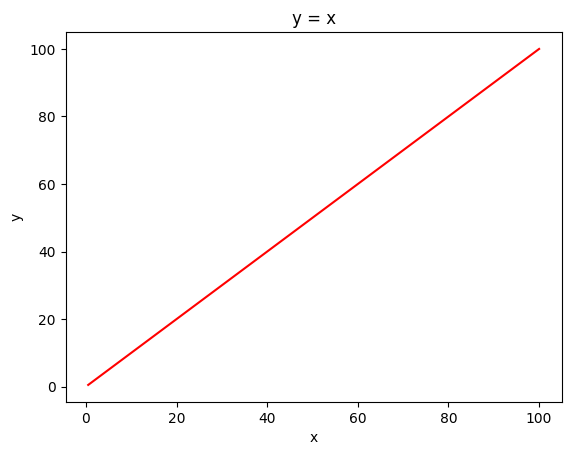

In [704]:
plt.plot(x,x, color = "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = x")
plt.show()

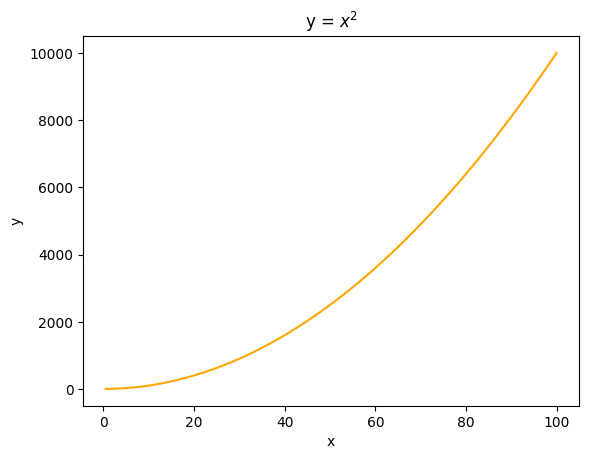

In [705]:
plt.plot(x , x**2, color = "orange")
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = $x^2$")
plt.show()

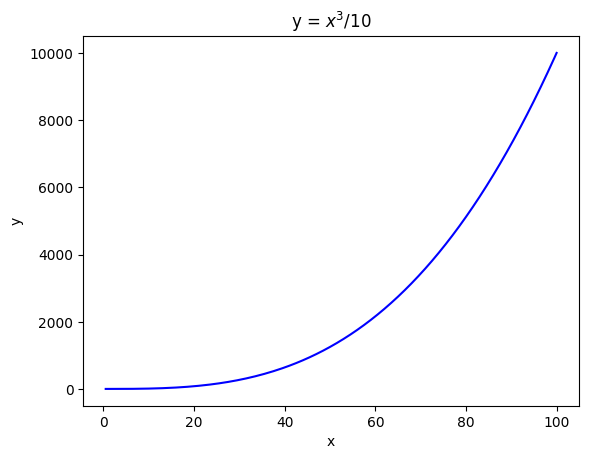

In [706]:
plt.plot(x, (x**3)/100, color = "blue")
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = $x^3$/10")
plt.show()

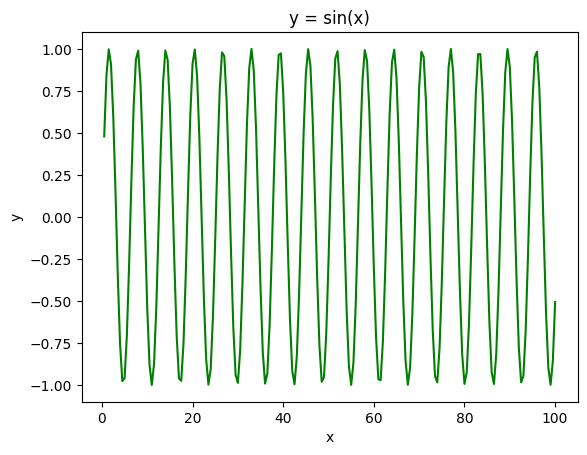

In [707]:
plt.plot(x, np.sin(x), color = "green")
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = sin(x)")
plt.show()

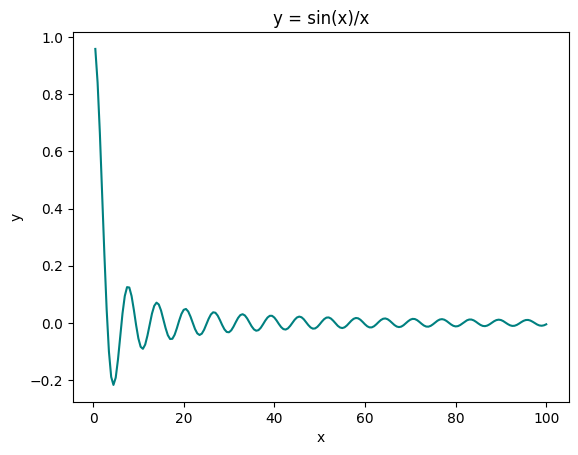

In [708]:
plt.plot(x, np.sin(x)/x, color = "teal")
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = sin(x)/x")
plt.show()

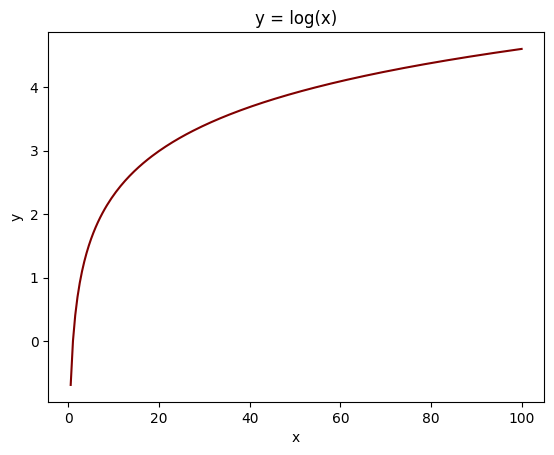

In [709]:
plt.plot(x, np.log(x), color = "maroon")
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = log(x)")
plt.show()

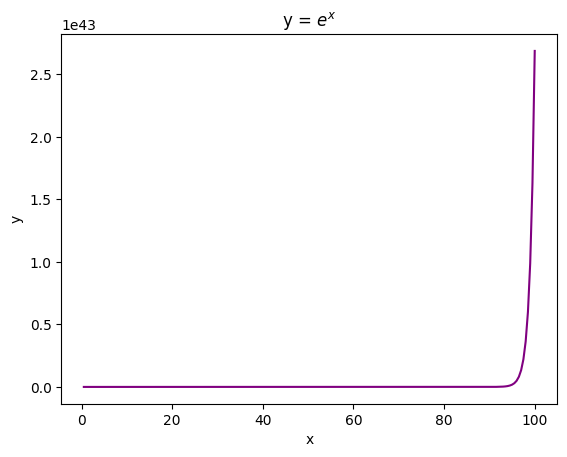

In [710]:
plt.plot(x, np.exp(x), color = "purple")
plt.xlabel("x")
plt.ylabel("y")
plt.title("y = $e^x$")
plt.show()

Question 10:

In [711]:
mat = np.random.uniform(1,2,(20,5))

mat_df = pd.DataFrame(mat, columns = ["a", "b", "c", "d" , "e"])

print("The column with the maximum standard deviation is :", mat_df.std(axis = 0).idxmax())
print("The row with the lowest mean is:", mat_df.mean(axis = 1).idxmin())

The column with the maximum standard deviation is : b
The row with the lowest mean is: 9


Question 11:

In [712]:
mat_df["f"] = mat_df.sum(axis = 1)
mat_df["g"] = "UT8"
mat_df.loc[mat_df["f"] < 8, "g"] = "LT8"
print("The standard deviation of the column f for the rows where the value in the column g is LT8 :", mat_df[mat_df["g"] == "LT8"]["f"].std())
print("The standard deviation of the column f for the rows where the value in the column g is UT8 :", mat_df[mat_df["g"] == "UT8"]["f"].std())

The standard deviation of the column f for the rows where the value in the column g is LT8 : 0.42400407094245773
The standard deviation of the column f for the rows where the value in the column g is UT8 : 0.29492429935958586


Question 12:

In the example below, the numpy array `x` is broadcasted to shape `(3,3)` by copying the same row again and again so that element by element addition can take place. In broadcasting when element by element operations need to be done, but the shapes of the operands are not compatible, they are made compatible.


In [713]:
x = np.array([1,2,3])
y = np.array([[1,0,0],[3,0,1],[7,8,9]])

print(x + y)    

[[ 2  2  3]
 [ 4  2  4]
 [ 8 10 12]]


Quesiton 13:

In [714]:
def arg_min(li):
    ans = 0
    mini = li[0]
    for i in range(1,len(li)):
        if li[i] < mini:
            mini = li[i]
            ans = i
    return ans

print(arg_min([1,7,-10,90]))
print(np.argmin([1,7,-10,90]))

2
2
